This jupyter notebook can be used to plot the number of common cells with no zero values shared by the considered number of genes.

In [26]:
library(data.table)
library(ggplot2)

In [3]:
# load data
# source: cell cycle data from Riba et al. You may download it from Zotero
# then you have to reformat it into:
#   - count. This is a matrix of cells x features, with no headers or column names
#   - features. This is a file containing one column with all the feature names. Thi shoud not have header either.
#   - barcodes. This is a file containing one column with all the barcode tags. Thi shoud not have header either.
count    = '../../run_scPropr/data/mouseStemCells/mouseStemCells_experimental_full_absolute.csv.gz'  
features = '../../run_scPropr/data/mouseStemCells/mouseStemCells_experimental_full_features.csv'
barcodes = '../../run_scPropr/data/mouseStemCells/mouseStemCells_experimental_full_barcodes.csv'
count    = as.matrix(fread(count))
features = fread(features, header=F)$V1
barcodes = fread(barcodes, header=F)$V1
colnames(count) = features

In [4]:
dim(count)  # cells x features

[1]  5637 12238

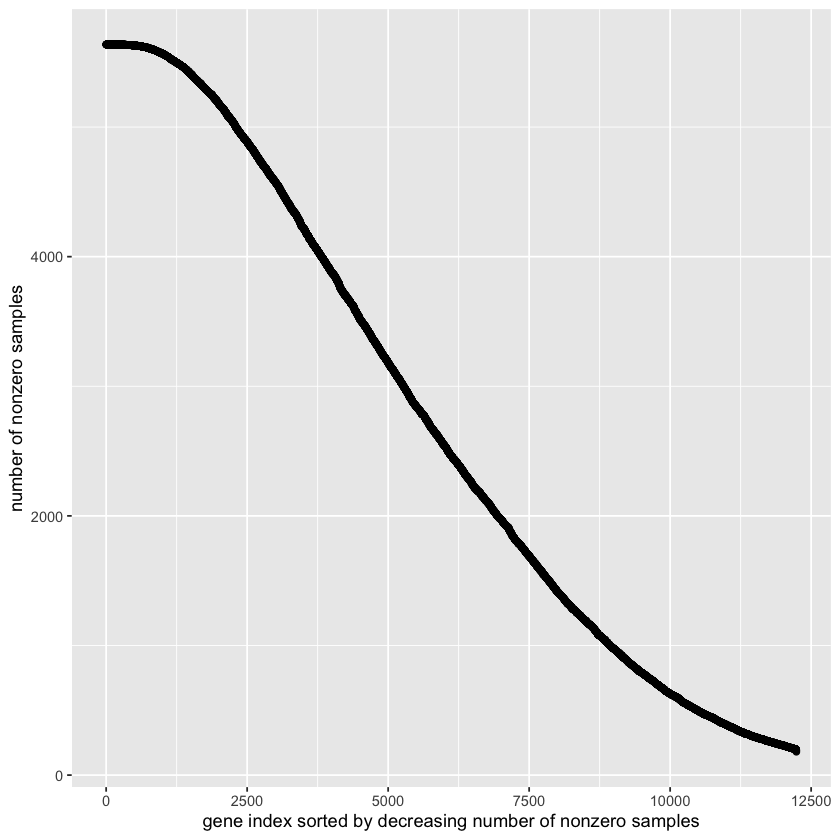

In [32]:
# for each gene, get the number of nonzero samples
set_nonzero_samples_per_gene = list()
n_nonzero_samples_per_gene   = c()
for (j in 1:ncol(count)){
    pos = which(count[,j] > 0)
    set_nonzero_samples_per_gene[[j]] = pos
    n_nonzero_samples_per_gene[j] = length(pos)
}

# sort by decreasing order
idx = order(n_nonzero_samples_per_gene, decreasing=T)
n_nonzero_samples_per_gene_ordered = n_nonzero_samples_per_gene[idx]

# plot figure
df = data.frame(
    'n_nonzero_samples_per_gene_ordered' = n_nonzero_samples_per_gene_ordered,
    'idx_gene_sorted' = 1:length(n_nonzero_samples_per_gene_ordered)
)
ggplot(df, aes(x=idx_gene_sorted, y=n_nonzero_samples_per_gene_ordered)) + 
    geom_point() +
    xlab('gene index sorted by decreasing number of nonzero samples') +
    ylab('number of nonzero samples')

Warning message:
"Removed 7238 rows containing missing values (`geom_point()`)."


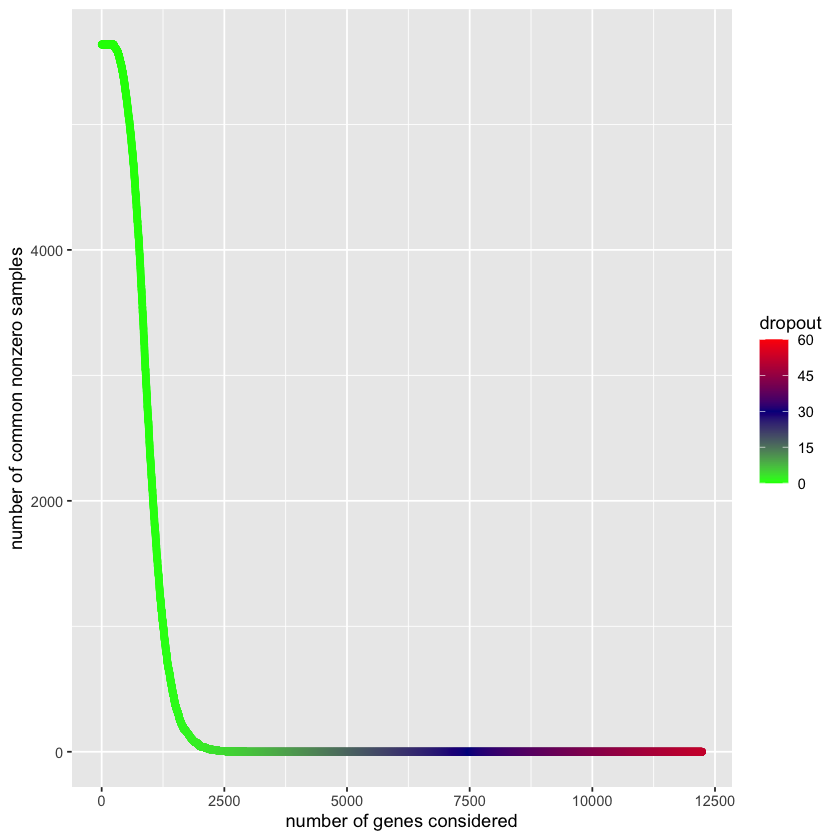

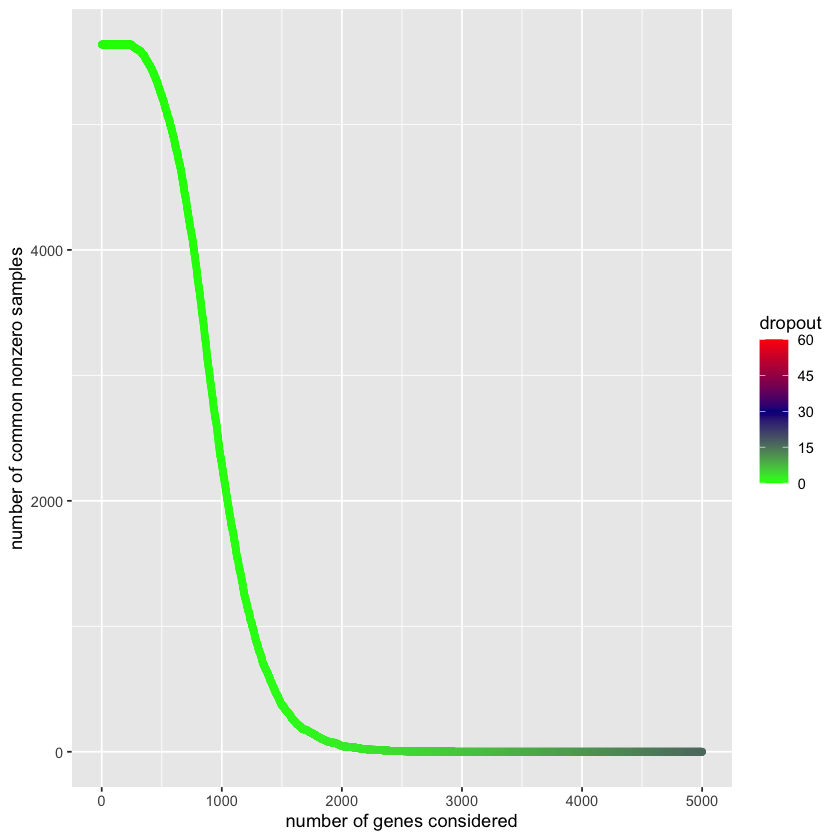

In [52]:
# start from the genes with most nonzero samples, 
# recursively get the intersection of *common* nonzero samples and new nonzero samples from the gene i
first = idx[[1]]
common_nonzero_sample_set = set_nonzero_samples_per_gene[[first]]
n_common_nonzero_sample_set = c()
n_reduced_gene_set = c()
history_common_nonzero_sample_set = list()
full_set_dropout = c()
dropout_per_gene = colMeans(count==0)*100
for (c in 1:length(idx)){
    j = idx[c]
    current_nonzero_sample_set =  set_nonzero_samples_per_gene[[j]]
    common_nonzero_sample_set = intersect(common_nonzero_sample_set, current_nonzero_sample_set)
    n_common_nonzero_sample_set[c] = length(common_nonzero_sample_set)
    history_common_nonzero_sample_set[[c]] = common_nonzero_sample_set
    full_set_dropout[c] = mean(dropout_per_gene[idx[1:c]])
}

# plot complete figure
df = data.frame(
    'n_common_nonzero_sample_set' = n_common_nonzero_sample_set,
    'n_genes' = 1:length(n_common_nonzero_sample_set),
    'dropout' = full_set_dropout
)
ggplot(df, aes(x=n_genes, y=n_common_nonzero_sample_set, col=dropout)) +
    geom_point() +
    xlab('number of genes considered') + 
    ylab('number of common nonzero samples') +
    scale_color_gradient2(low = "green", mid = "darkblue", high = "red", midpoint=30, breaks=c(0,15,30,45,60), limits=c(0,60))

# zoom in
df = data.frame(
    'n_common_nonzero_sample_set' = n_common_nonzero_sample_set,
    'n_genes' = 1:length(n_common_nonzero_sample_set),
    'dropout' = full_set_dropout
)
ggplot(df, aes(x=n_genes, y=n_common_nonzero_sample_set, col=dropout)) +
    geom_point() +
    xlim(0,5000) +
    xlab('number of genes considered') + 
    ylab('number of common nonzero samples') +
    scale_color_gradient2(low = "green", mid = "darkblue", high = "red", midpoint=30, breaks=c(0,15,30,45,60), limits=c(0,60))